<a href="https://colab.research.google.com/github/AyeshaIjazTabassum/PythonAIBootcamp/blob/main/Day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

**Loading Data/ Overview**

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.shape

(150, 5)

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Handling duplicates**

In [7]:
df.duplicated(keep=False)==True
df[df.duplicated(keep=False)==True]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [8]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
93,5.0,2.3,3.3,1.0,versicolor


**Extracting Features and Target**

In [10]:
#Features
X=df.iloc[:,:-1]
#Target
y=df.iloc[:,-1]

**Splitting data into training and testing sets**

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Encoding target column**

In [12]:
label=LabelEncoder()
label.fit(y_train)
y_train=label.transform(y_train)
y_test=label.transform(y_test)

# **Decision Tree Classifier**

In [17]:
clf_dt=DecisionTreeClassifier() # use the max_depth parameter to set the depth of decision tree
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
X_train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

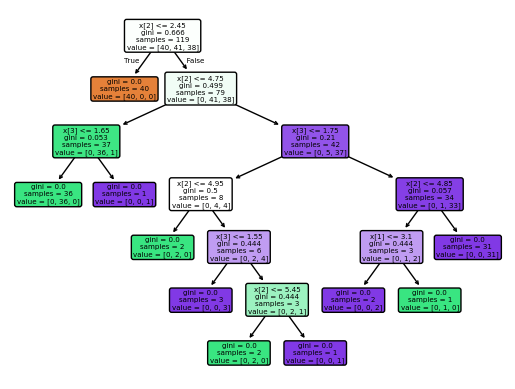

In [19]:
from sklearn.tree import plot_tree
plot_tree(clf_dt,filled=True,rounded=True)
plt.show()

In [20]:
predictions_dt=clf_dt.predict(X_test)
predictions_dt

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [21]:
accuracy_score(y_test,predictions_dt)

1.0

In [22]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [23]:
print(classification_report(y_test,predictions_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [24]:
confusion_matrix(y_test,predictions_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [25]:
clf_dt.classes_
label.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

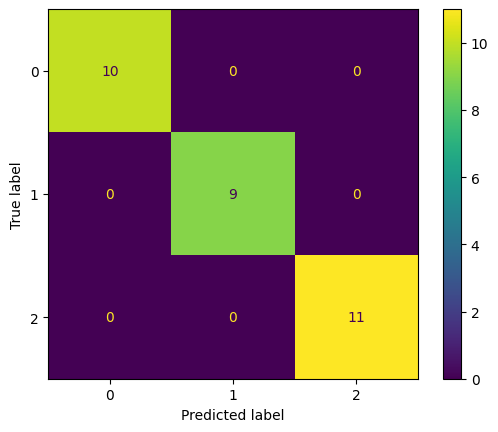

In [26]:
CM=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predictions_dt),display_labels=clf_dt.classes_)
CM.plot()

In [27]:
label.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [28]:
clf_dt.feature_importances_

array([0.        , 0.01681503, 0.90565555, 0.07752942])

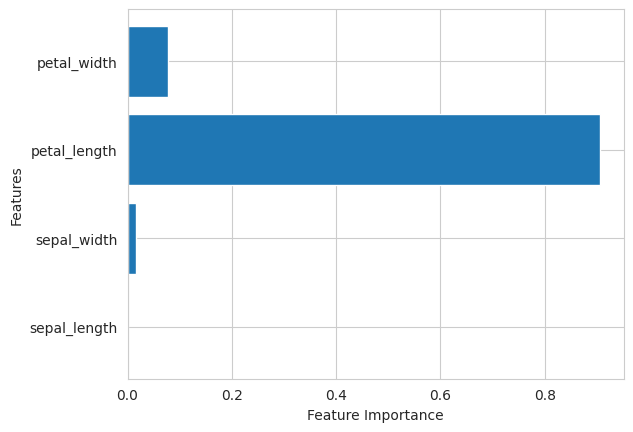

In [29]:
#feature importance
sns.set_style('whitegrid')
plt.barh(width=clf_dt.feature_importances_,y=list(X.columns))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# **Random Forest Classifier**

In [30]:
clf_rf=RandomForestClassifier()
clf_rf.fit(X_train,y_train)


RandomForestClassifier()

In [31]:
predictions_rf=clf_rf.predict(X_test)
predictions_rf

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [32]:
accuracy_score(y_test,predictions_rf)

1.0

In [33]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



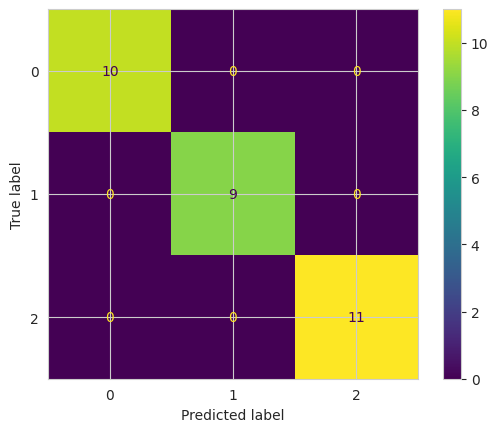

In [34]:
CM_rf=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predictions_rf),display_labels=clf_rf.classes_)
CM_rf.plot()

In [35]:
pd.DataFrame({
    'Models':['Decision Tree Classifier','Random Forest Classifier'],
    'Accuracy':[accuracy_score(y_test,predictions_dt),accuracy_score(y_test,predictions_rf)]
})

,Models,Accuracy
0,Decision Tree Classifier,1.0
1,Random Forest Classifier,1.0
